In [2]:
run_0 = ['228-289', '271-295', '247-286', '271-296', '299-351', '245-271', '271-285', '272-285']

run_1 = ['271-296', '262-285', '245-295', '215-294', '270-287']
         
run_2 = ['228-289', '271-296']
         
run_3 = ['246-318', '246-317', '246-284', '246-285', '270-287', '245-334', '245-297', '203-311', '272-285', '203-310']
         
run_4 = ['228-289', '287-295']
         
run_5 = ['298-349', '205-208', '226-349', '238-323', '226-331', '192-325']
         
run_6 = ['268-271', '269-272', '265-269', '267-271', '266-270', '270-334', '269-349', '268-287', '265-349']
         
run_7 = ['204-207', '259-349', '228-289']
         
run_8 = ['242-326', '242-305', '242-332', '245-307', '216-245', '245-319', '266-269', '236-242']
         
run_9 = ['228-289', '194-197', '205-208']
         
run_10 = ['307-335', '307-336', '205-208', '268-351', '270-287', '245-336', '270-346', '274-343']         

In [3]:
runs = [run_0, run_1, run_2, run_3, run_4, run_5, run_6, run_7, run_8, run_9, run_10]

In [5]:
for run in runs:
    run_ = [(int(x.split('-')[0])-191, int(x.split('-')[1])-191) for x in run]
    print(run_)

[(37, 98), (80, 104), (56, 95), (80, 105), (108, 160), (54, 80), (80, 94), (81, 94)]
[(80, 105), (71, 94), (54, 104), (24, 103), (79, 96)]
[(37, 98), (80, 105)]
[(55, 127), (55, 126), (55, 93), (55, 94), (79, 96), (54, 143), (54, 106), (12, 120), (81, 94), (12, 119)]
[(37, 98), (96, 104)]
[(107, 158), (14, 17), (35, 158), (47, 132), (35, 140), (1, 134)]
[(77, 80), (78, 81), (74, 78), (76, 80), (75, 79), (79, 143), (78, 158), (77, 96), (74, 158)]
[(13, 16), (68, 158), (37, 98)]
[(51, 135), (51, 114), (51, 141), (54, 116), (25, 54), (54, 128), (75, 78), (45, 51)]
[(37, 98), (3, 6), (14, 17)]
[(116, 144), (116, 145), (14, 17), (77, 160), (79, 96), (54, 145), (79, 155), (83, 152)]


In [6]:
contacts_dict = {
0: [(37, 98), (80, 104), (56, 95), (80, 105), (108, 160), (54, 80), (80, 94), (81, 94)],
1: [(80, 105), (71, 94), (54, 104), (24, 103), (79, 96)],
2: [(37, 98), (80, 105)],
3: [(55, 127), (55, 126), (55, 93), (55, 94), (79, 96), (54, 143), (54, 106), (12, 120), (81, 94), (12, 119)],
4: [(37, 98), (96, 104)],
5: [(107, 158), (14, 17), (35, 158), (47, 132), (35, 140), (1, 134)],
6: [(77, 80), (78, 81), (74, 78), (76, 80), (75, 79), (79, 143), (78, 158), (77, 96), (74, 158)],
7: [(13, 16), (68, 158), (37, 98)],
8: [(51, 135), (51, 114), (51, 141), (54, 116), (25, 54), (54, 128), (75, 78), (45, 51)],
9: [(37, 98), (3, 6), (14, 17)],
10: [(116, 144), (116, 145), (14, 17), (77, 160), (79, 96), (54, 145), (79, 155), (83, 152)]
}

In [2]:
### 
# data extracted, look at how many frames we're dealing with

In [4]:
import numpy as np

In [13]:
frame_indexes = np.load('extract_frames_indexes.npy')

In [14]:
frame_indexes.shape

(11,)

In [15]:
lengths = []

for x in frame_indexes:
    lengths.append(len(x)/2)

In [16]:
lengths

[10260.0,
 10284.0,
 9241.5,
 10068.0,
 9333.5,
 10169.0,
 9947.0,
 9632.0,
 10301.0,
 10061.0,
 10176.5]

In [17]:
# too many frames - limit to those that are here and also in the 10-frame strided trajectories - then extract
# from those. So translate to 10-frame strided indexes now - anything divisable by 10, divide by 10 and that's the
# new frame index, anything else throw out

In [18]:
frame_indexes_10strided = []

for x in frame_indexes:
    frame_indexes_ = []
    for frame in x:
        if frame[1]%10 == 0:
            frame_indexes_.append((frame[0], int(frame[1]/10)))
    frame_indexes_10strided.append(frame_indexes_)

In [19]:
# that wasn't too only too many frames - that was pretty much all the frames - I'm only considering the trajectory
# fragments > 750 microseconds

In [20]:
# tried only extracting those frames in which the top contact from Shi's list is established - let's see how 
# many frames

In [21]:
frame_indexes2 = np.load('extract_frames_indexes2.npy')

In [22]:
frame_indexes2.shape

(6,)

In [23]:
lengths = []

for x in frame_indexes2:
    lengths.append(len(x)/2)

In [24]:
lengths

[353.0, 585.0, 646.5, 665.5, 1964.0, 3368.5]

In [25]:
# that also was too much - tried just RUN0, with ALL contacts present at the same time - including all positive 
# contacts, then without one, two etc. until top3

In [26]:
frame_indexes2 = np.load('extract_frames_indexes2.npy')

In [27]:
frame_indexes2.shape

(6,)

In [28]:
lengths = []

for x in frame_indexes2:
    lengths.append(len(x)/2)

In [29]:
lengths

[353.0, 585.0, 646.5, 665.5, 1964.0, 3368.5]

In [30]:
len(frame_indexes2[1])

1170

In [31]:
# ok finally decided to look for frames that have ALL top5 (or less) contacts established (only positive for now still)

In [32]:
frame_indexes = np.load('extract_frames_indexes_all_top5.npy')

In [33]:
frame_indexes.shape

(11,)

In [34]:
lengths = []

for x in frame_indexes:
    lengths.append(len(x)/2)

In [35]:
lengths

[665.5, 646.0, 4135.0, 231.0, 6836.0, 6.5, 0.0, 792.0, 0.0, 1912.5, 38.5]

In [36]:
# leave out 2 and 4 - too big - the others extract every 10th frame
# translate to every +1500 and leave only every 10th

In [37]:
frame_indexes_10strided = []

for x in frame_indexes:
    frame_indexes_ = []
    for frame in x:
        if frame[1]%10 == 0:
            frame_indexes_.append((frame[0], int(frame[1])+1500))
    frame_indexes_10strided.append(frame_indexes_)

In [38]:
frame_indexes_10strided[5]

[]

In [39]:
# nothing left in 5 - just take not every 10th, but all

In [40]:
frame_indexes[5]

[(5, 121),
 (5, 122),
 (5, 126),
 (5, 146),
 (5, 147),
 (5, 148),
 (5, 397),
 (5, 435),
 (5, 451),
 (5, 473),
 (5, 476),
 (5, 482),
 (5, 504)]

In [43]:
frame_indexes_10strided[5] = [(x[0], x[1]+1500) for x in frame_indexes[5]]

In [50]:
frame_indexes_10strided[2] = []

In [51]:
frame_indexes_10strided[4] = []

In [52]:
np.save('extract_frames_indexes_all_top5_strided10', frame_indexes_10strided)

In [88]:
# extract on external hard drive

In [3]:
import mdtraj as md

In [48]:
for run in range(11):
    if not frame_indexes_10strided[run]:
        continue
    
    started = False
    for (clone,frame) in frame_indexes_10strided[run]:
        if not started:
            traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run,clone))[frame]
            started = True
        else:
            traj_ = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run,clone))[frame]
            traj = md.join([traj, traj_])
            
    traj.save('/Volumes/DATA/11713_extracted_frames/run%d.h5' % run)

In [53]:
for run in range(11):
    if not frame_indexes_10strided[run]:
        continue
        
    traj = md.load('/Volumes/DATA/11713_extracted_frames/run%d.h5' % run)
    traj = traj.atom_slice(traj.top.select('not element H'))
    traj.save('/Volumes/DATA/11713_extracted_frames/run%d.dcd' % run)

In [1]:
# Shi's come back with potential new conformations for two of the mutants - let's check those against the wt
# RUN9: 1) 51-52, 2) 53-64, 3) 65-108, 4) 319-341

In [37]:
frame_indexes_10strided = np.load('extract_frames_indexes_all_top5_strided10.npy')

In [56]:
frame_indexes_10strided[9][51:53]

[(8, 1640), (13, 1530)]

In [57]:
# we're going to calculate RMSD of the chosen frames to all frames in wt
# first as reference let's calculate RMSD of all frames in RUN9 to all frames in wt

In [5]:
import glob

In [64]:
run9_traj = md.load('/Volumes/DATA/11713/run9-clone0.h5')[1500:][::10]
run9_traj = run9_traj.atom_slice(run9_traj.top.select('name CA'))

for clone in range(40):
    if clone == 0:
        continue
    traj = md.load('/Volumes/DATA/11713/run9-clone%d.h5' % clone)[1500:][::10]
    traj = traj.atom_slice(traj.top.select('name CA'))
    run9_traj = md.join([run9_traj, traj])
    print(clone)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [7]:
wt_traj = md.load('/Volumes/DATA/11713_wt/run0-clone0.h5')
wt_traj = wt_traj.atom_slice(wt_traj.top.select('name CA'))

for traj in glob.glob('/Volumes/DATA/11713_wt/*.h5')[1:]:
    traj_ = md.load(traj)[1500:][::10]
    traj_ = traj_.atom_slice(traj_.top.select('name CA'))
    wt_traj = md.join([wt_traj, traj_])

In [68]:
run9_all_rmsd = []

for frame in range(len(wt_traj)):
    rmsd = md.rmsd(run9_traj, wt_traj, frame=frame)
    run9_all_rmsd.append(rmsd)
    print(frame)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135


3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832


5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324


In [70]:
np.concatenate(run9_all_rmsd).shape

(10974825,)

In [8]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


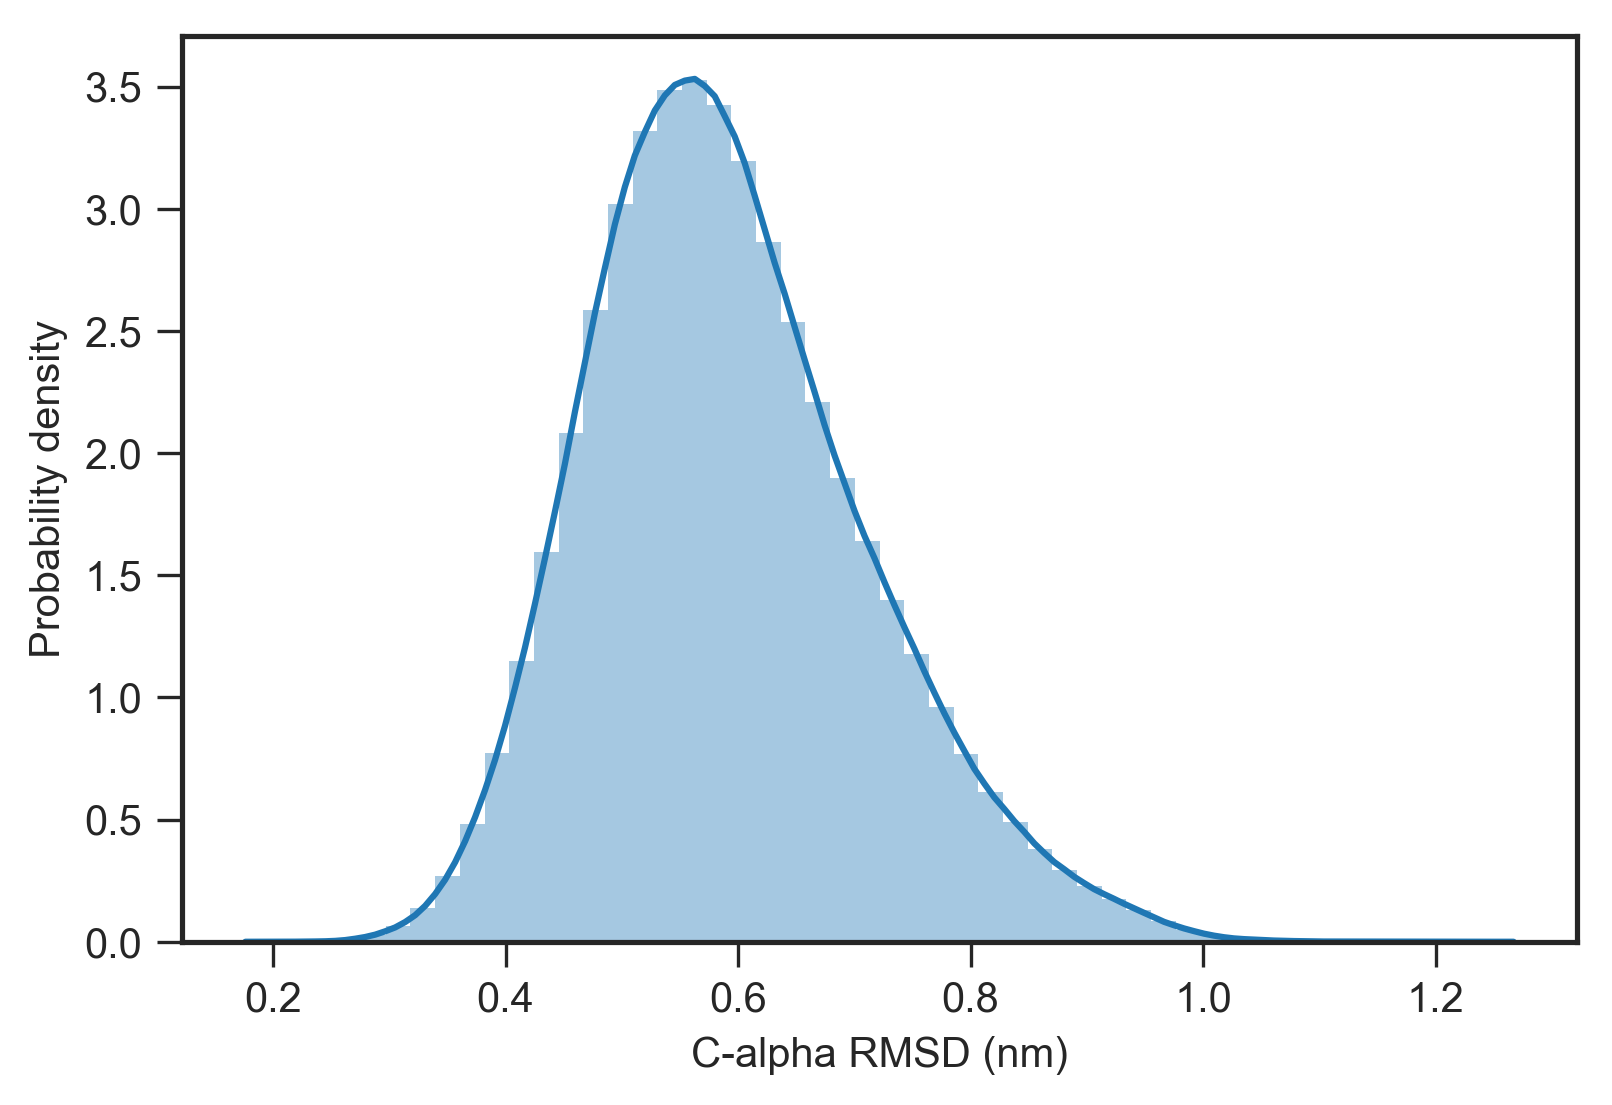

In [99]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(run9_all_rmsd))
ax.set_xlabel('C-alpha RMSD (nm)')
ax.set_ylabel('Probability density')
plt.show()

In [74]:
# now calculate the RMSDs of the groups of new conformations

In [75]:
# RUN9: 1) 51-52, 2) 53-64, 3) 65-108, 4) 319-341

In [82]:
# in 0-index: 1) 50-51, 2) 52-63, 3) 64-107, 4) 318-340

In [84]:
# so put into array range: 1) 50:52, 2) 52:64, 3) 64:108, 4) 318:341

In [85]:
frame_indexes_10strided[9][50:52]

[(8, 1550), (8, 1640)]

In [36]:
run9_newconf_trajs = []

In [38]:
choice = frame_indexes_10strided[9][50:52]

newconf_traj = md.load('/Volumes/DATA/11713/run9-clone%d.h5' % choice[0][0])[choice[0][1]]

for frame in choice[1:]:
    traj = md.load('/Volumes/DATA/11713/run9-clone%d.h5' % frame[0])[frame[1]]
    newconf_traj = md.join([newconf_traj, traj])
    
run9_newconf_trajs.append(newconf_traj)

In [39]:
choice = frame_indexes_10strided[9][52:64]

newconf_traj = md.load('/Volumes/DATA/11713/run9-clone%d.h5' % choice[0][0])[choice[0][1]]

for frame in choice[1:]:
    traj = md.load('/Volumes/DATA/11713/run9-clone%d.h5' % frame[0])[frame[1]]
    newconf_traj = md.join([newconf_traj, traj])
    
run9_newconf_trajs.append(newconf_traj)

In [40]:
choice = frame_indexes_10strided[9][64:108]

newconf_traj = md.load('/Volumes/DATA/11713/run9-clone%d.h5' % choice[0][0])[choice[0][1]]

for frame in choice[1:]:
    traj = md.load('/Volumes/DATA/11713/run9-clone%d.h5' % frame[0])[frame[1]]
    newconf_traj = md.join([newconf_traj, traj])
    
run9_newconf_trajs.append(newconf_traj)

In [41]:
choice = frame_indexes_10strided[9][318:341]

newconf_traj = md.load('/Volumes/DATA/11713/run9-clone%d.h5' % choice[0][0])[choice[0][1]]

for frame in choice[1:]:
    traj = md.load('/Volumes/DATA/11713/run9-clone%d.h5' % frame[0])[frame[1]]
    newconf_traj = md.join([newconf_traj, traj])
    
run9_newconf_trajs.append(newconf_traj)

In [42]:
run9_newconf_trajs

[<mdtraj.Trajectory with 2 frames, 2580 atoms, 162 residues, and unitcells at 0x127245da0>,
 <mdtraj.Trajectory with 12 frames, 2580 atoms, 162 residues, and unitcells at 0x1280b2e48>,
 <mdtraj.Trajectory with 44 frames, 2580 atoms, 162 residues, and unitcells at 0x127974be0>,
 <mdtraj.Trajectory with 23 frames, 2580 atoms, 162 residues, and unitcells at 0x1271e7c88>]

In [14]:
run9_newconf_rmsd = []

for traj in run9_newconf_trajs:
    traj = traj.atom_slice(traj.top.select('name CA'))
    run9_newconf_rmsd.append([])
    for frame in range(len(wt_traj)):
        rmsd = md.rmsd(traj, wt_traj, frame=frame)
        run9_newconf_rmsd[-1].append(rmsd)

In [15]:
len(run9_newconf_rmsd)

4

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


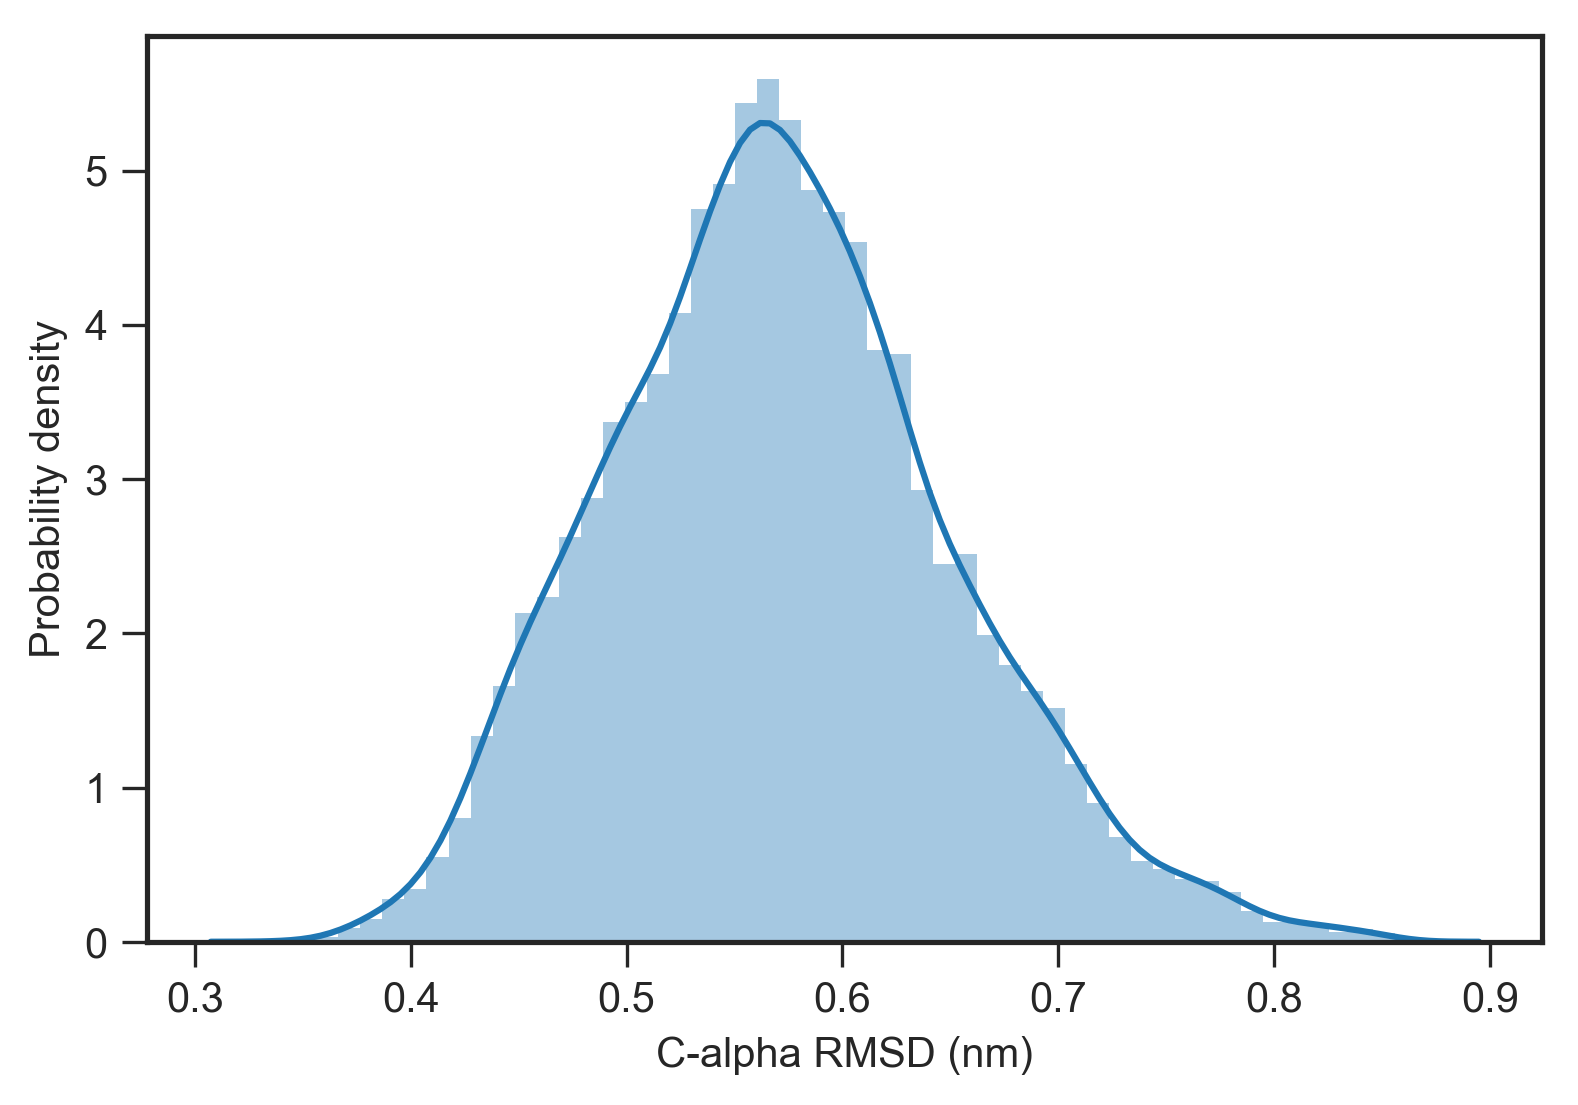

In [100]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(run9_newconf_rmsd[0]))
ax.set_xlabel('C-alpha RMSD (nm)')
ax.set_ylabel('Probability density')
plt.show()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


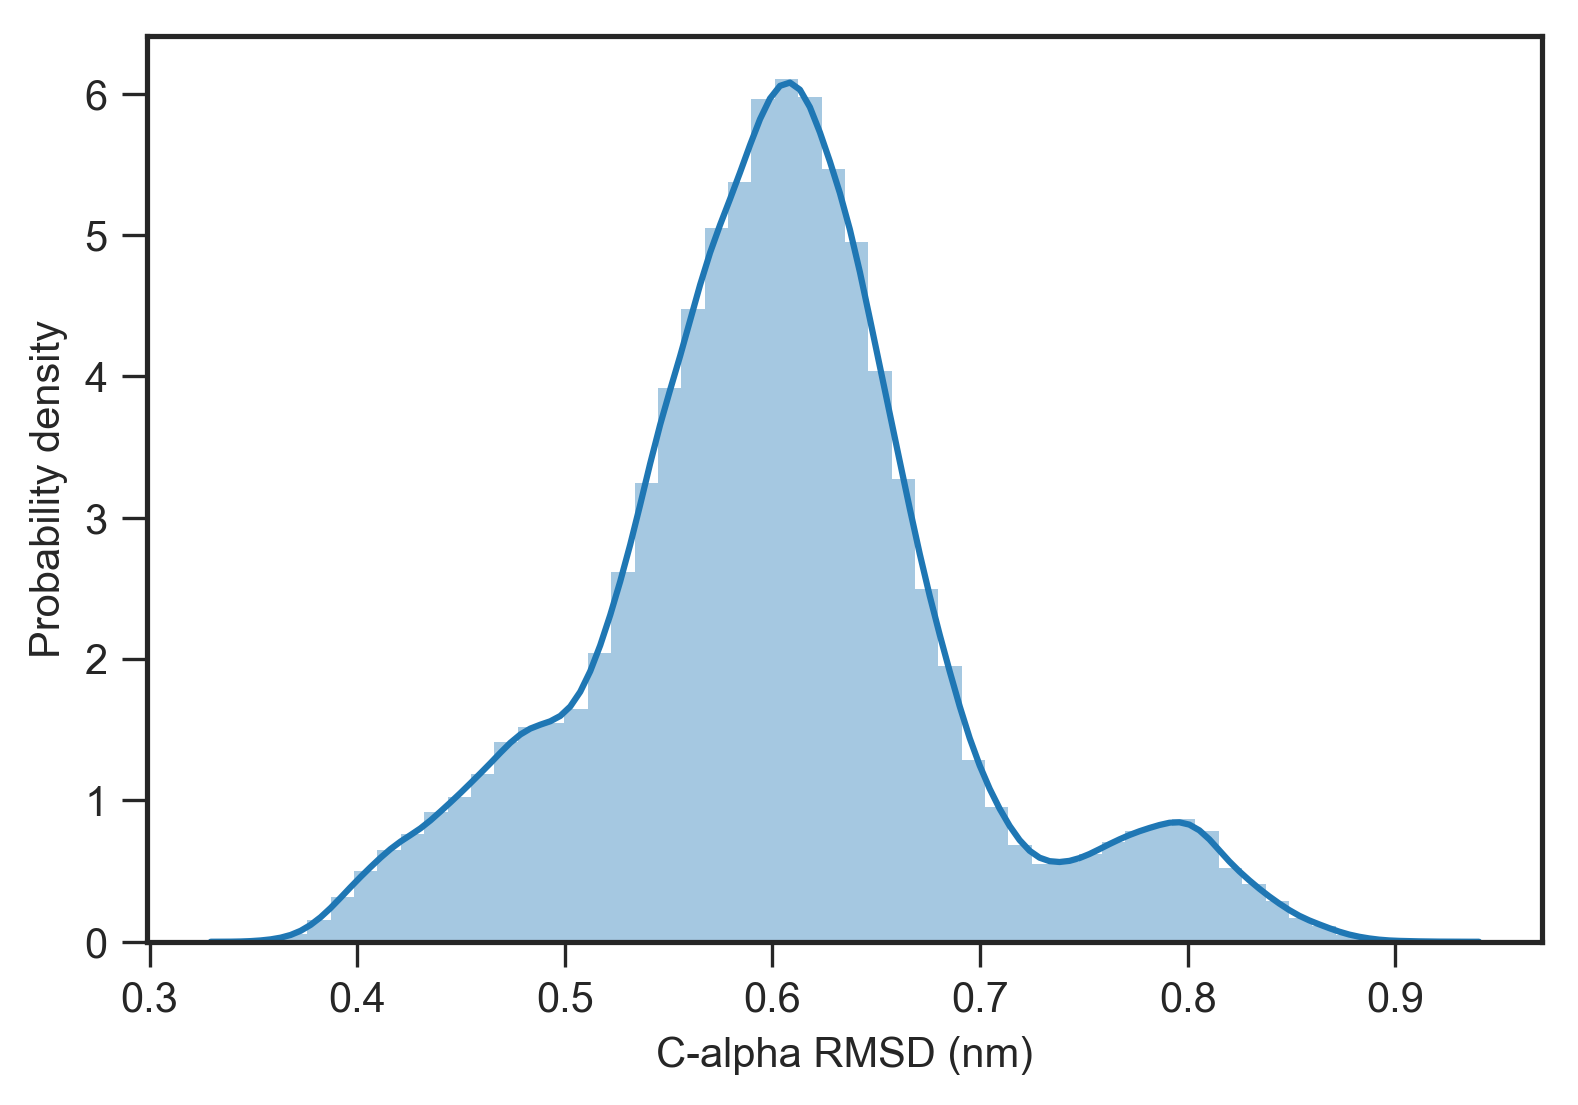

In [101]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(run9_newconf_rmsd[1]))
ax.set_xlabel('C-alpha RMSD (nm)')
ax.set_ylabel('Probability density')
plt.show()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


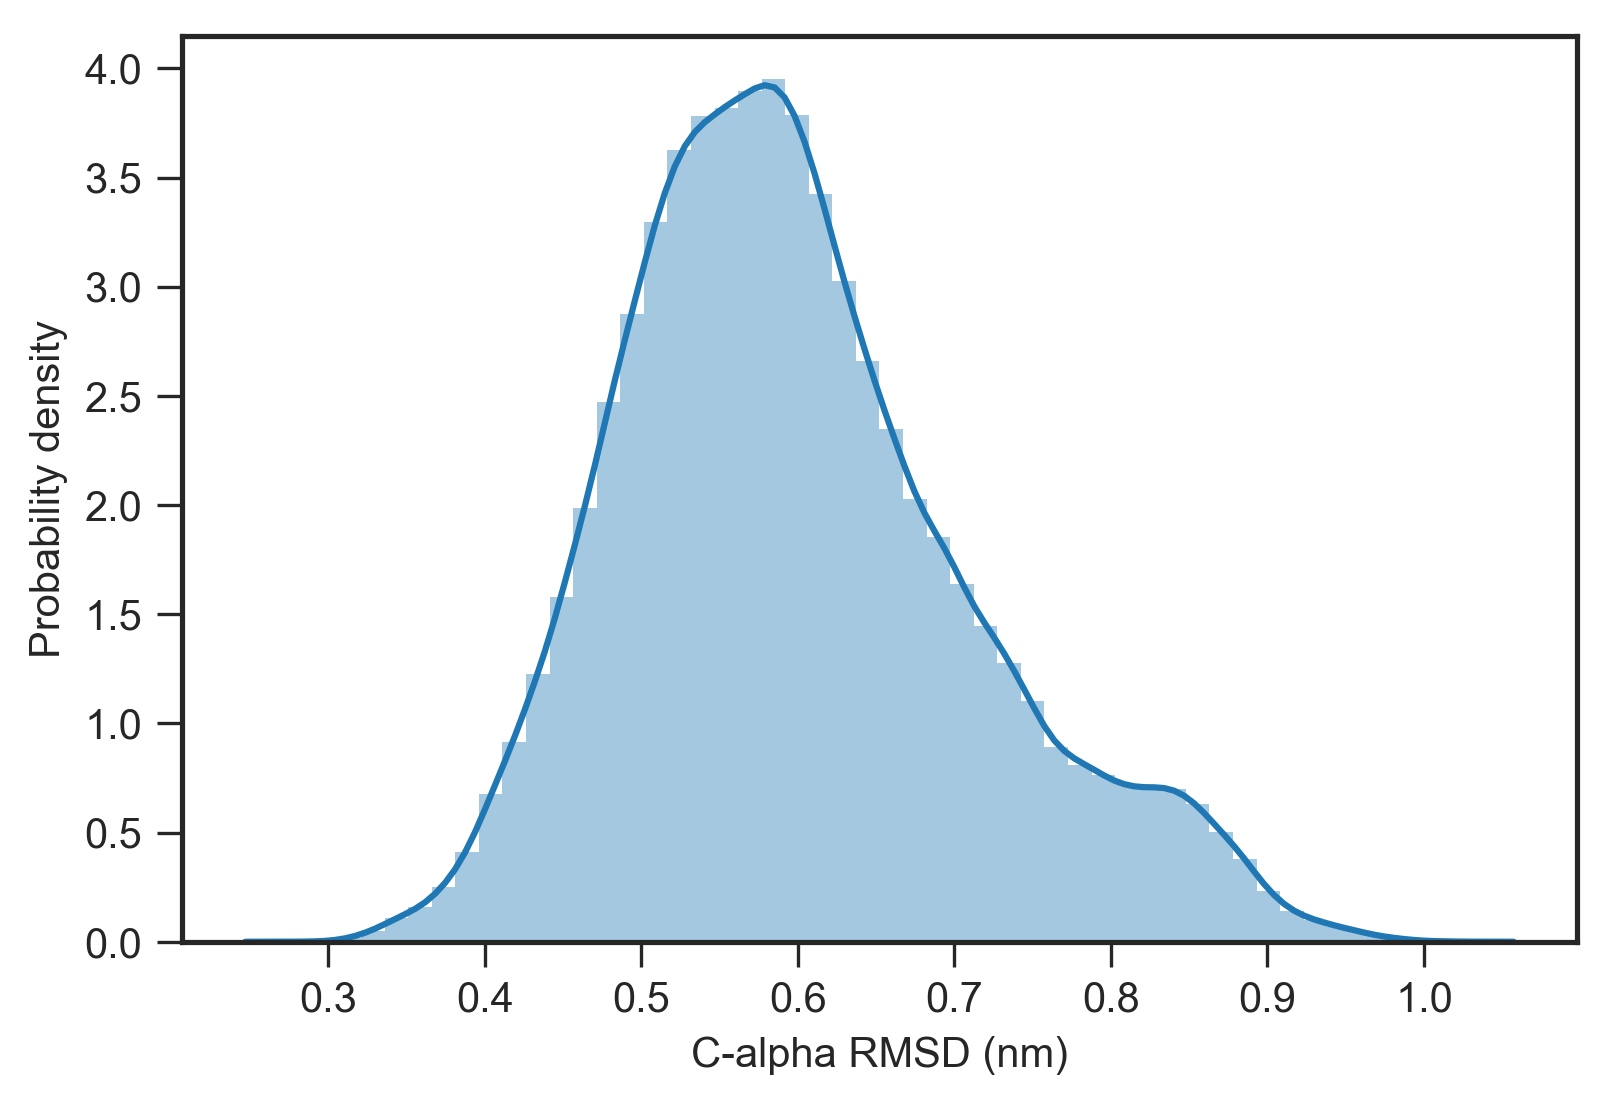

In [123]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(run9_newconf_rmsd[2]))
ax.set_xlabel('C-alpha RMSD (nm)')
ax.set_ylabel('Probability density')
plt.show()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


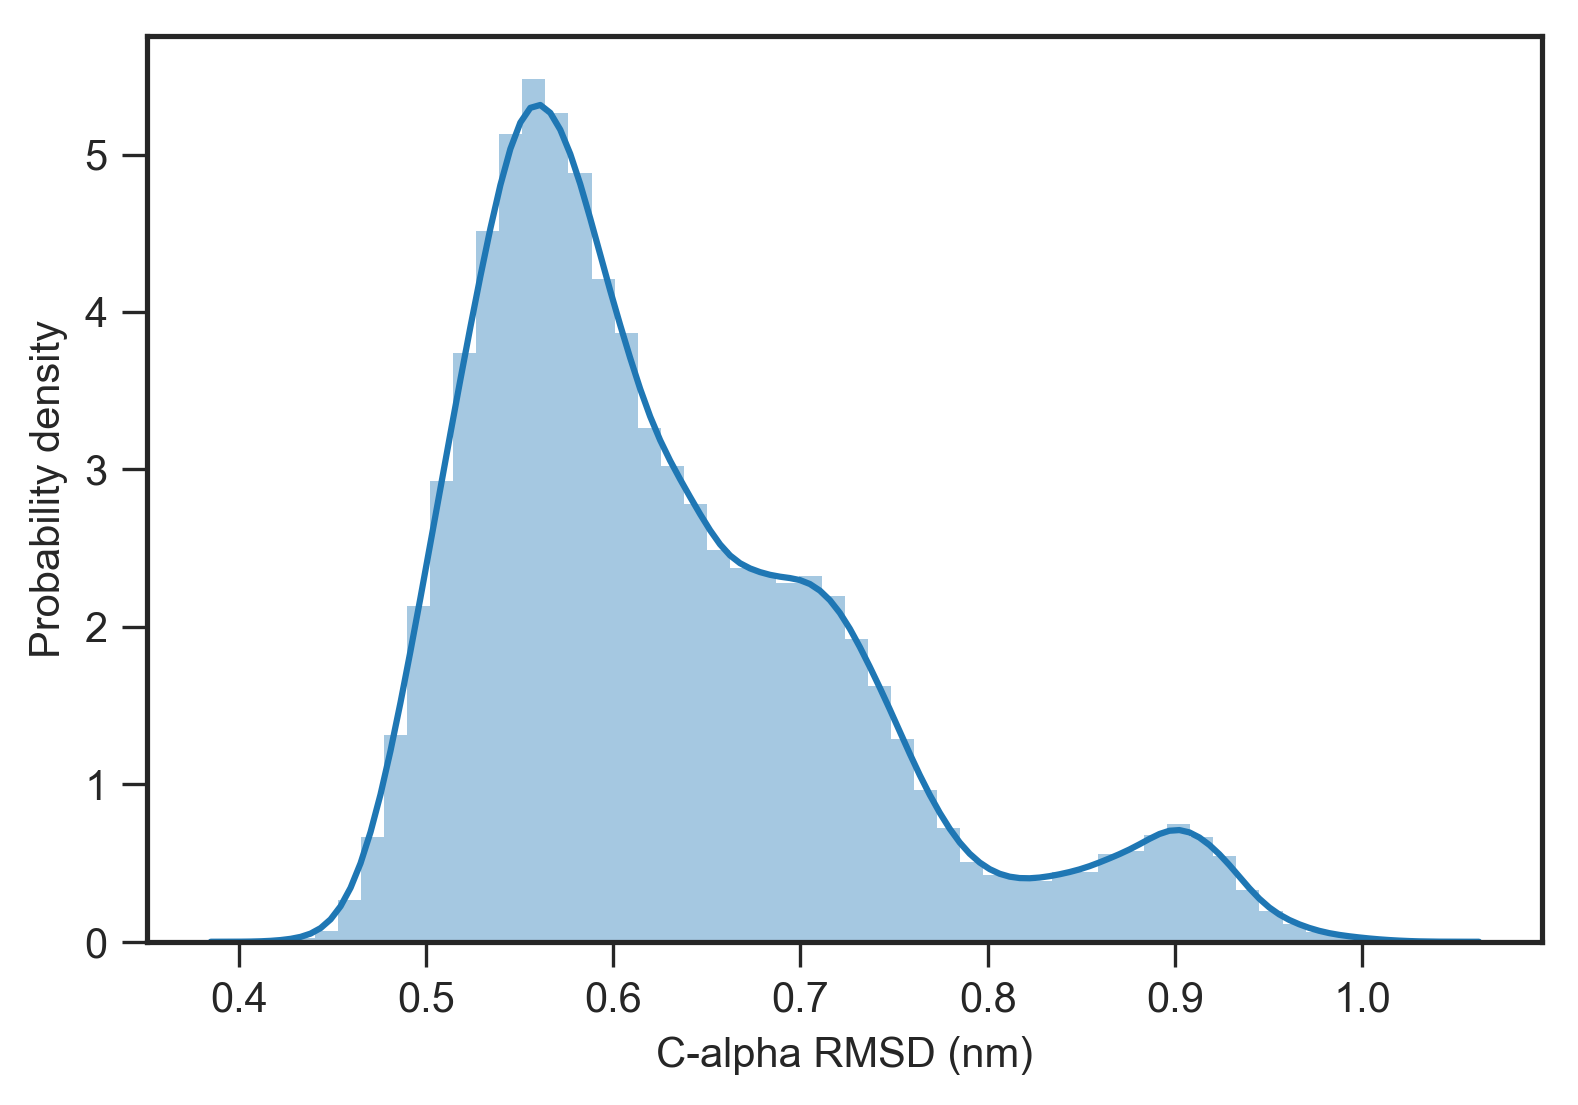

In [124]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(run9_newconf_rmsd[3]))
ax.set_xlabel('C-alpha RMSD (nm)')
ax.set_ylabel('Probability density')
plt.show()

In [125]:
# yeah this is not telling me much

In [126]:
# let's also show rmsd of very frame within wt to every other for completion

In [129]:
wt_all_rmsd = []

for frame in range(len(wt_traj)):
    rmsd = md.rmsd(wt_traj, wt_traj, frame=frame)
    wt_all_rmsd.append(rmsd)

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


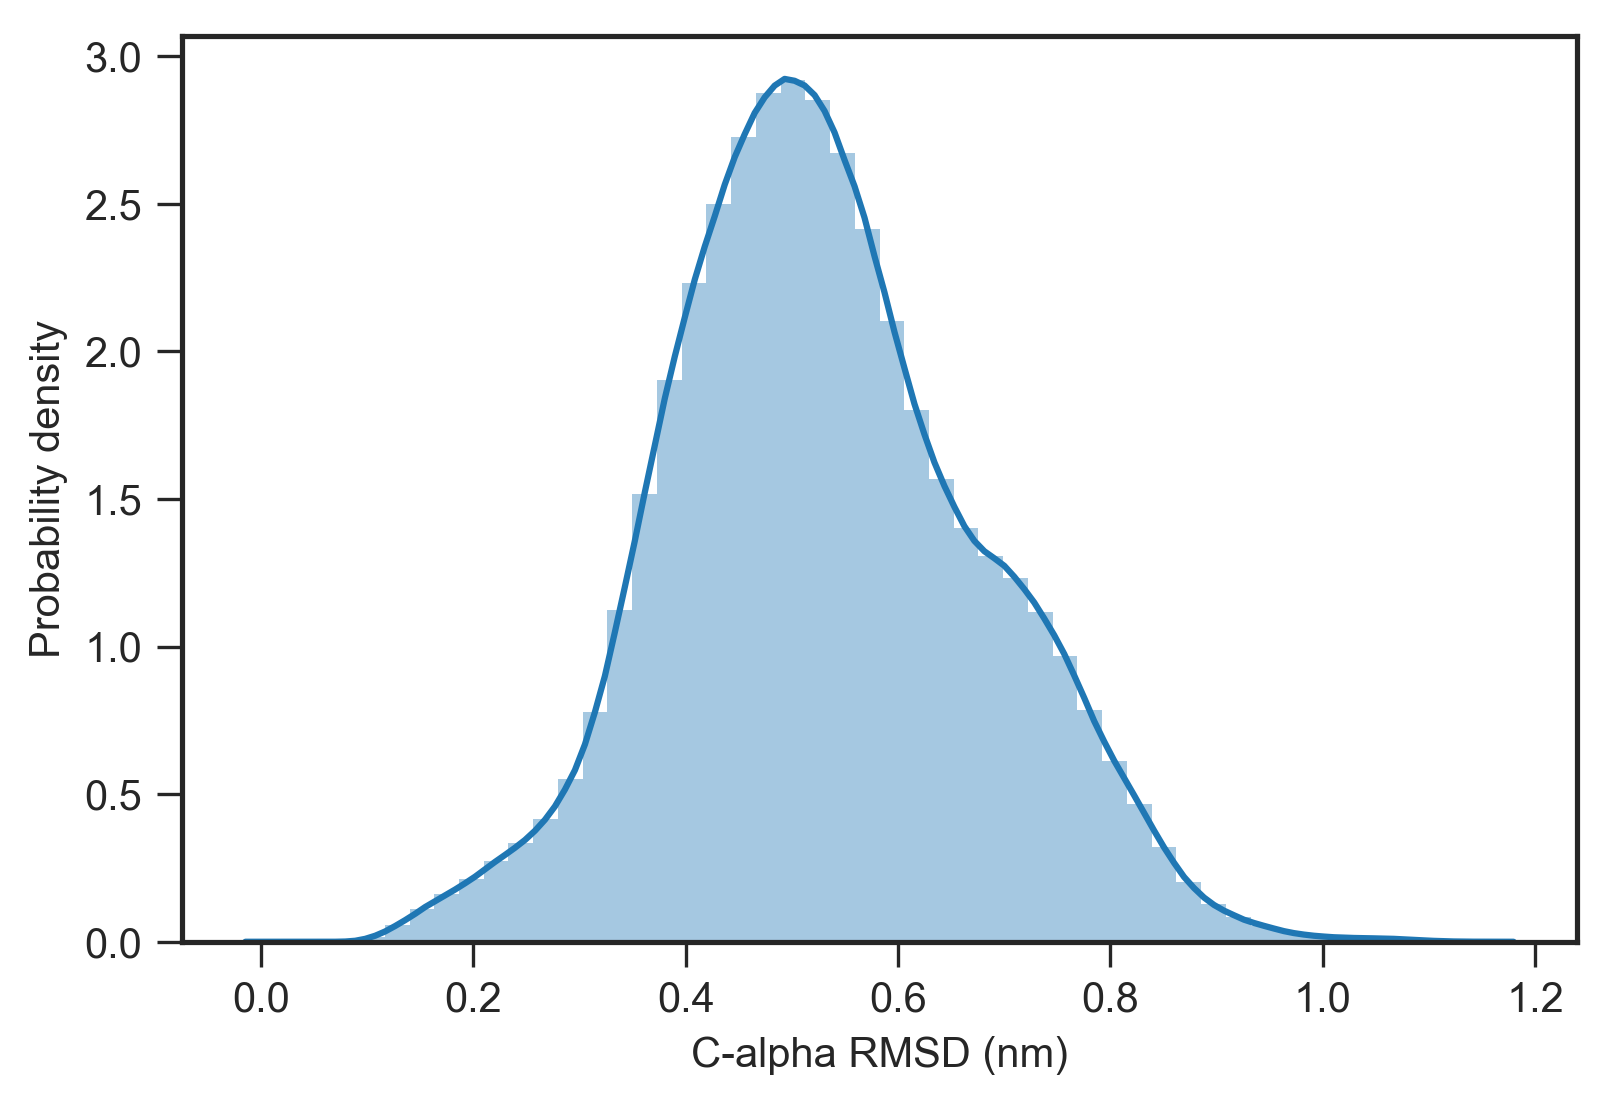

In [130]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(wt_all_rmsd))
ax.set_xlabel('C-alpha RMSD (nm)')
ax.set_ylabel('Probability density')
plt.show()

In [1]:
# also extract the wt frames which are closest in RMSD from the chosen 'new conformation' frames

In [20]:
run9_newconf_rmsd = np.array(run9_newconf_rmsd)

In [21]:
run9_newconf_rmsd.shape

(4, 5325)

In [44]:
np.argmin(np.vstack(run9_newconf_rmsd[0])[:,0])

2525

In [45]:
np.min(np.vstack(run9_newconf_rmsd[0])[:,0])

0.35866717

In [37]:
np.vstack(run9_newconf_rmsd[0]).shape[1]

2

In [46]:
run9_newconf_minrmsd_frames = []

for i in range(4):
    run9_newconf_minrmsd_frames.append([])
    for frame in range(np.vstack(run9_newconf_rmsd[i]).shape[1]):
        run9_newconf_minrmsd_frames[-1].append(np.argmin(np.vstack(run9_newconf_rmsd[i])[:,frame]))

In [48]:
run9_newconf_minrmsd_frames

[[2525, 2525],
 [4502, 4502, 2878, 2878, 4482, 2692, 4502, 2878, 3844, 2878, 2878, 2878],
 [2703,
  2718,
  2718,
  2718,
  2718,
  2702,
  3699,
  3689,
  5196,
  5197,
  2702,
  2703,
  3689,
  2703,
  3689,
  2709,
  3859,
  5188,
  2709,
  2703,
  2709,
  5182,
  2709,
  5182,
  5196,
  5161,
  2703,
  2703,
  2703,
  2704,
  3699,
  2703,
  2703,
  2703,
  2703,
  2704,
  2704,
  2704,
  2703,
  2703,
  2704,
  2703,
  2703,
  2709],
 [4958,
  4958,
  38,
  4958,
  4958,
  4146,
  4959,
  4963,
  4961,
  4842,
  4963,
  38,
  4961,
  3811,
  4218,
  3811,
  3811,
  38,
  38,
  38,
  5295,
  5295,
  38]]

In [41]:
# ok so these are very similar - let's make into sets - also show the rmsds first

In [49]:
run9_newconf_minrmsd_frames_rmsds = []

for i in range(4):
    run9_newconf_minrmsd_frames_rmsds.append([])
    for frame in range(np.vstack(run9_newconf_rmsd[i]).shape[1]):
        run9_newconf_minrmsd_frames_rmsds[-1].append(np.min(np.vstack(run9_newconf_rmsd[i])[:,frame]))

In [51]:
run9_newconf_minrmsd_frames_rmsds

[[0.35866717, 0.34604511],
 [0.36481008,
  0.35563061,
  0.35360613,
  0.35348517,
  0.36797774,
  0.35892969,
  0.36490664,
  0.38077572,
  0.37388563,
  0.39445317,
  0.37420043,
  0.38044065],
 [0.32961887,
  0.31982636,
  0.32474154,
  0.32462782,
  0.31984285,
  0.33837637,
  0.32099339,
  0.31590304,
  0.30754045,
  0.30996636,
  0.32534543,
  0.29644257,
  0.29831699,
  0.30314222,
  0.32701394,
  0.34295499,
  0.35809052,
  0.34270391,
  0.32223925,
  0.31873307,
  0.32524642,
  0.33102295,
  0.31557909,
  0.32211411,
  0.31732744,
  0.34591442,
  0.31871414,
  0.29615203,
  0.31685454,
  0.33751738,
  0.27580819,
  0.32523829,
  0.32328632,
  0.34043109,
  0.32509983,
  0.31808877,
  0.3406297,
  0.31482065,
  0.33114412,
  0.33750677,
  0.31299272,
  0.33049327,
  0.33029827,
  0.36011282],
 [0.43387669,
  0.41605225,
  0.43164885,
  0.44215396,
  0.42592481,
  0.42786071,
  0.42067838,
  0.43968877,
  0.4267334,
  0.45771968,
  0.45274484,
  0.46021888,
  0.45386067,
  0.441

In [52]:
run9_newconf_minrmsd_frames_sets = []

for x in run9_newconf_minrmsd_frames:
    run9_newconf_minrmsd_frames_sets.append(set(x))

In [53]:
run9_newconf_minrmsd_frames_sets

[{2525},
 {2692, 2878, 3844, 4482, 4502},
 {2702,
  2703,
  2704,
  2709,
  2718,
  3689,
  3699,
  3859,
  5161,
  5182,
  5188,
  5196,
  5197},
 {38, 3811, 4146, 4218, 4842, 4958, 4959, 4961, 4963, 5295}]

In [54]:
# now save these as h5's

In [55]:
wt_traj = md.load('/Volumes/DATA/11713_wt/run0-clone0.h5')

for traj in glob.glob('/Volumes/DATA/11713_wt/*.h5')[1:]:
    traj_ = md.load(traj)[1500:][::10]
    wt_traj = md.join([wt_traj, traj_])
    print(traj)

/Volumes/DATA/11713_wt/run0-clone1.h5
/Volumes/DATA/11713_wt/run0-clone10.h5
/Volumes/DATA/11713_wt/run0-clone11.h5
/Volumes/DATA/11713_wt/run0-clone12.h5
/Volumes/DATA/11713_wt/run0-clone13.h5
/Volumes/DATA/11713_wt/run0-clone14.h5
/Volumes/DATA/11713_wt/run0-clone15.h5
/Volumes/DATA/11713_wt/run0-clone16.h5
/Volumes/DATA/11713_wt/run0-clone17.h5
/Volumes/DATA/11713_wt/run0-clone18.h5
/Volumes/DATA/11713_wt/run0-clone19.h5
/Volumes/DATA/11713_wt/run0-clone2.h5
/Volumes/DATA/11713_wt/run0-clone20.h5
/Volumes/DATA/11713_wt/run0-clone21.h5
/Volumes/DATA/11713_wt/run0-clone22.h5
/Volumes/DATA/11713_wt/run0-clone23.h5
/Volumes/DATA/11713_wt/run0-clone24.h5
/Volumes/DATA/11713_wt/run0-clone25.h5
/Volumes/DATA/11713_wt/run0-clone26.h5
/Volumes/DATA/11713_wt/run0-clone27.h5
/Volumes/DATA/11713_wt/run0-clone28.h5
/Volumes/DATA/11713_wt/run0-clone29.h5
/Volumes/DATA/11713_wt/run0-clone3.h5
/Volumes/DATA/11713_wt/run0-clone4.h5
/Volumes/DATA/11713_wt/run0-clone5.h5
/Volumes/DATA/11713_wt/run0-cl

In [60]:
for run in range(4):
    for frame in run9_newconf_minrmsd_frames_sets[run]:
        wt_traj[frame].save('new_conf_closest_wt_frames/%d_%d.h5' % (run,frame))
        wt_traj[frame].save('new_conf_closest_wt_frames/%d_%d.pdb' % (run,frame))

In [57]:
#mkdir new_conf_closest_wt_frames

In [61]:
ls new_conf_closest_wt_frames

0_2525.h5   1_4502.h5   2_2718.h5   2_5182.h5   3_3811.h5   3_4959.h5
0_2525.pdb  1_4502.pdb  2_2718.pdb  2_5182.pdb  3_3811.pdb  3_4959.pdb
1_2692.h5   2_2702.h5   2_3689.h5   2_5188.h5   3_4146.h5   3_4961.h5
1_2692.pdb  2_2702.pdb  2_3689.pdb  2_5188.pdb  3_4146.pdb  3_4961.pdb
1_2878.h5   2_2703.h5   2_3699.h5   2_5196.h5   3_4218.h5   3_4963.h5
1_2878.pdb  2_2703.pdb  2_3699.pdb  2_5196.pdb  3_4218.pdb  3_4963.pdb
1_3844.h5   2_2704.h5   2_3859.h5   2_5197.h5   3_4842.h5   3_5295.h5
1_3844.pdb  2_2704.pdb  2_3859.pdb  2_5197.pdb  3_4842.pdb  3_5295.pdb
1_4482.h5   2_2709.h5   2_5161.h5   3_38.h5     3_4958.h5
1_4482.pdb  2_2709.pdb  2_5161.pdb  3_38.pdb    3_4958.pdb


In [62]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11713_SET8_apo_cancer_mutants'

In [1]:
# ok now we'll do the same thing I did with RMSD, but with contact maps - i.e. calc contact maps
# for the new conformations and calculate their absolute difference to all of the wt frames

In [2]:
# first references - all frames of RUN9 to wt

In [25]:
import glob
import mdtraj as md
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

In [2]:
run9_traj = md.load('/Volumes/DATA/11713/run9-clone0.h5')[1500:][::10]

for clone in range(40):
    if clone == 0:
        continue
    traj = md.load('/Volumes/DATA/11713/run9-clone%d.h5' % clone)[1500:][::10]
    run9_traj = md.join([run9_traj, traj])

In [3]:
run9_traj

<mdtraj.Trajectory with 2061 frames, 2580 atoms, 162 residues, and unitcells at 0x12839e898>

In [4]:
distances, residue_pairs = md.compute_contacts(run9_traj)

In [5]:
contact_map = md.geometry.squareform(distances, residue_pairs)
contact_map_bool = contact_map < 0.4
contact_map_bool_float = contact_map_bool.astype('float')

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.


In [6]:
contact_map_bool_float.shape

(2061, 162, 162)

In [7]:
run9_contact_maps = contact_map_bool_float

In [8]:
run9_contact_maps.shape

(2061, 162, 162)

In [9]:
wt_contact_maps = []

for contact_map in glob.glob('/Volumes/DATA/11713_wt_contact_maps/*.npy'):
    contact_map_ = np.load(contact_map)
    wt_contact_maps.append(contact_map_)

In [10]:
np.vstack(wt_contact_maps).shape

(32849, 162, 162)

In [11]:
wt_contact_maps = np.vstack(wt_contact_maps)

In [12]:
#run9_all_contact_diffs = []

#for frame in range(run9_contact_maps.shape[0]):
#    diffs = np.sum(np.absolute(wt_contact_maps[::10] - run9_contact_maps[frame]), axis=(1,2))
#    run9_all_contact_diffs.append(diffs)
#    print(frame)

In [36]:
# too slow - multiprocess

In [13]:
import multiprocessing

In [14]:
counter = 0

In [18]:
def calc_diffs(frame):
    global counter
    diffs = np.sum(np.absolute(wt_contact_maps[::10] - run9_contact_maps[frame]), axis=(1,2))
    counter += 1
    print(counter)
    return(diffs)

In [19]:
pool = multiprocessing.Pool(8)

1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
35
35
35
35
35
35
35
35
36
36
36
36
36
36
36
36
37
37
37
37
37
37
37
37
38
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
40
40
40
40
40
40
40
40
41
41
41
41
41
41
41
41
42
42
42
42
42
42
42
42
43
43
43
43
43
43
43
43
44
44
44
44
44
44
44
44
45
45
45
45
45
4

In [20]:
run9_all_contact_diffs = pool.map(calc_diffs, range(run9_contact_maps.shape[0]))

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


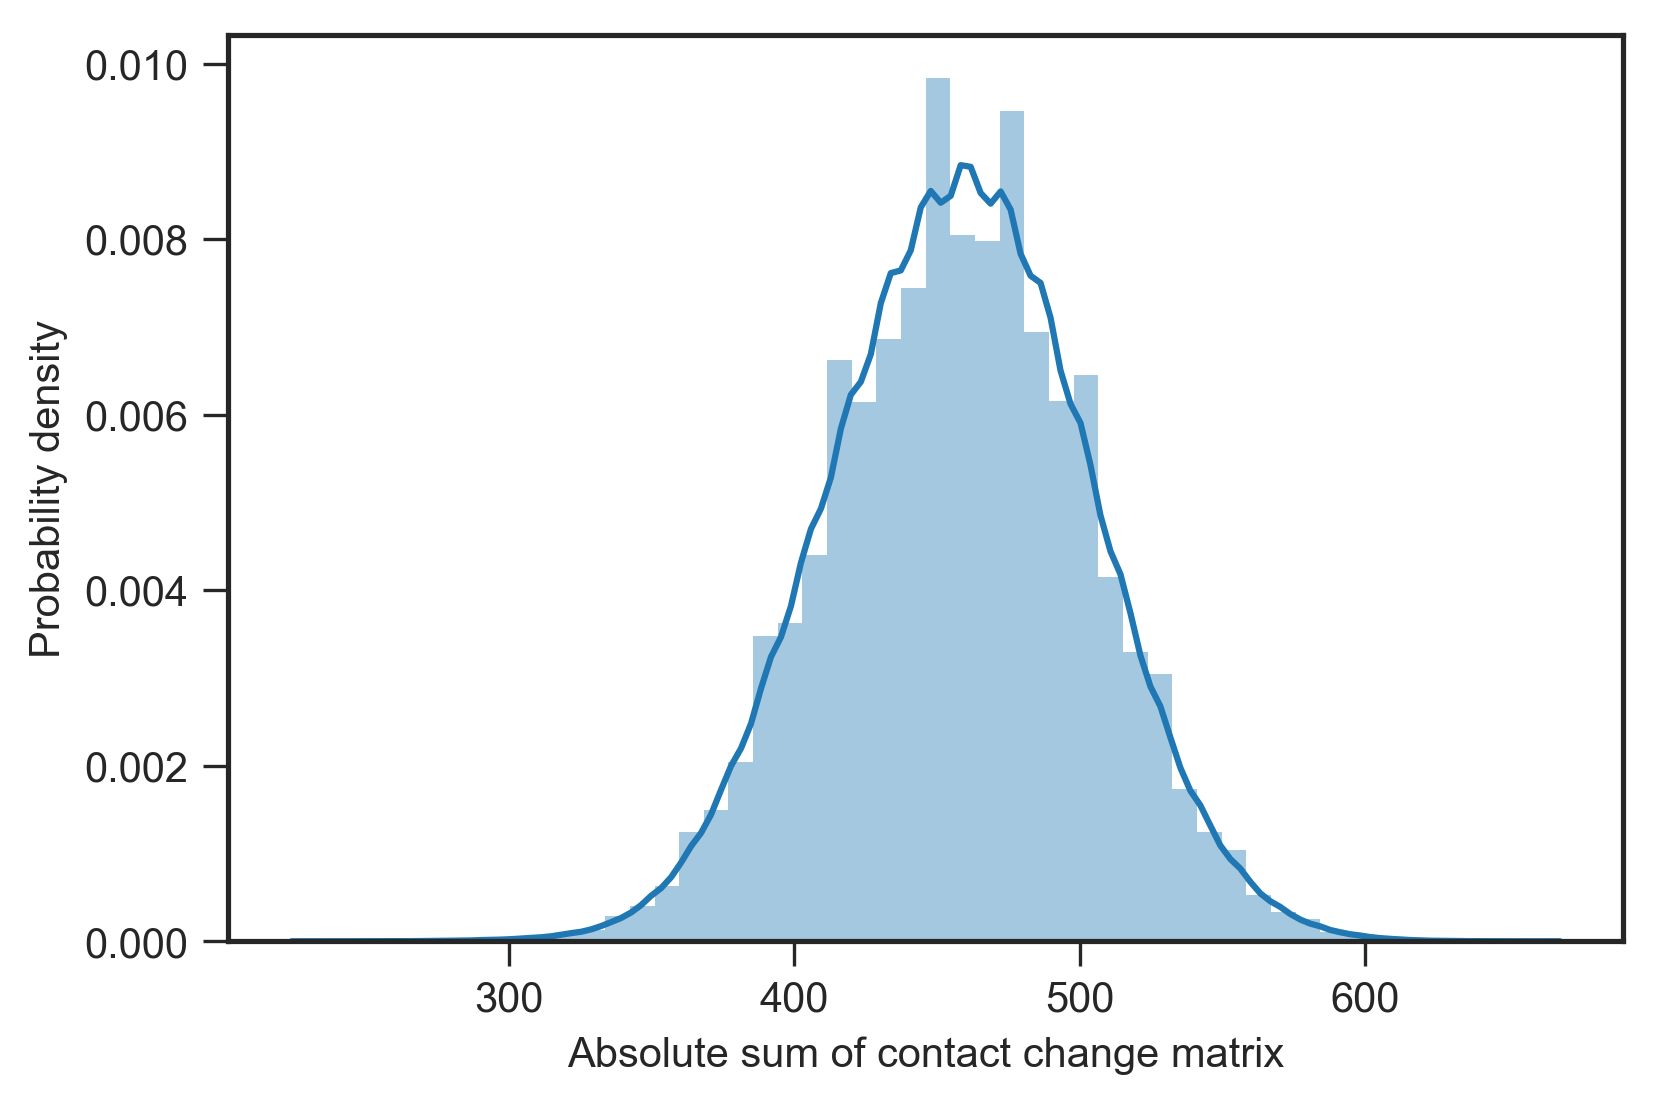

In [27]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(run9_all_contact_diffs))
ax.set_xlabel('Absolute sum of contact change matrix')
ax.set_ylabel('Probability density')
plt.show()

In [28]:
np.save('run9_all_contact_diffs', run9_all_contact_diffs)

In [29]:
# ok now wt to wt

In [30]:
def calc_diffs_wt(frame):
    global counter
    diffs = np.sum(np.absolute(wt_contact_maps[::10] - wt_contact_maps[::10][frame]), axis=(1,2))
    counter += 1
    print(counter)
    return(diffs)

In [31]:
pool = multiprocessing.Pool(8)

1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
35
35
35
35
35
35
35
35
36
36
36
36
36
36
36
36
37
37
37
37
37
37
37
37
38
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
40
40
40
40
40
40
40
40
41
41
41
41
41
41
41
41
42
42
42
42
42
42
42
42
43
43
43
43
43
43
43
43
44
44
44
44
44
44
44
44
45
45
45
45
45
4

285
285
284
284
283
284
284
284
286
286
285
285
284
285
285
287
285
287
286
286
285
286
286
288
286
288
287
287
286
287
287
289
287
289
288
288
287
288
288
290
288
290
289
288
289
289
289
291
289
291
290
289
290
290
290
292
290
292
291
290
291
291
291
293
291
293
292
292
291
292
292
294
292
294
293
293
292
293
293
295
293
295
294
294
293
294
294
296
294
296
295
295
294
295
295
297
295
297
296
296
295
296
296
298
296
298
297
297
296
297
297
299
297
299
298
297
298
298
298
300
298
300
299
298
299
299
299
301
299
301
300
299
300
300
300
302
300
302
301
300
301
301
301
303
301
303
302
301
302
302
302
304
302
304
303
302
303
303
303
305
305
303
304
303
304
304
304
306
306
304
305
304
305
305
307
305
305
307
306
305
306
306
308
306
306
308
307
306
307
307
309
307
307
309
308
307
308
308
310
308
310
308
309
308
309
311
309
309
311
309
310
309
310
312
310
310
312
310
311
310
311
313
311
311
313
311
312
311
312
314
312
312
314
312
313
312
313
315
313
313
315
313
314
313
314
316
314
314
316
314


In [32]:
wt_all_contact_diffs = pool.map(calc_diffs_wt, range(wt_contact_maps[::10].shape[0]))

In [33]:
np.save('wt_all_contact_diffs', wt_all_contact_diffs)

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


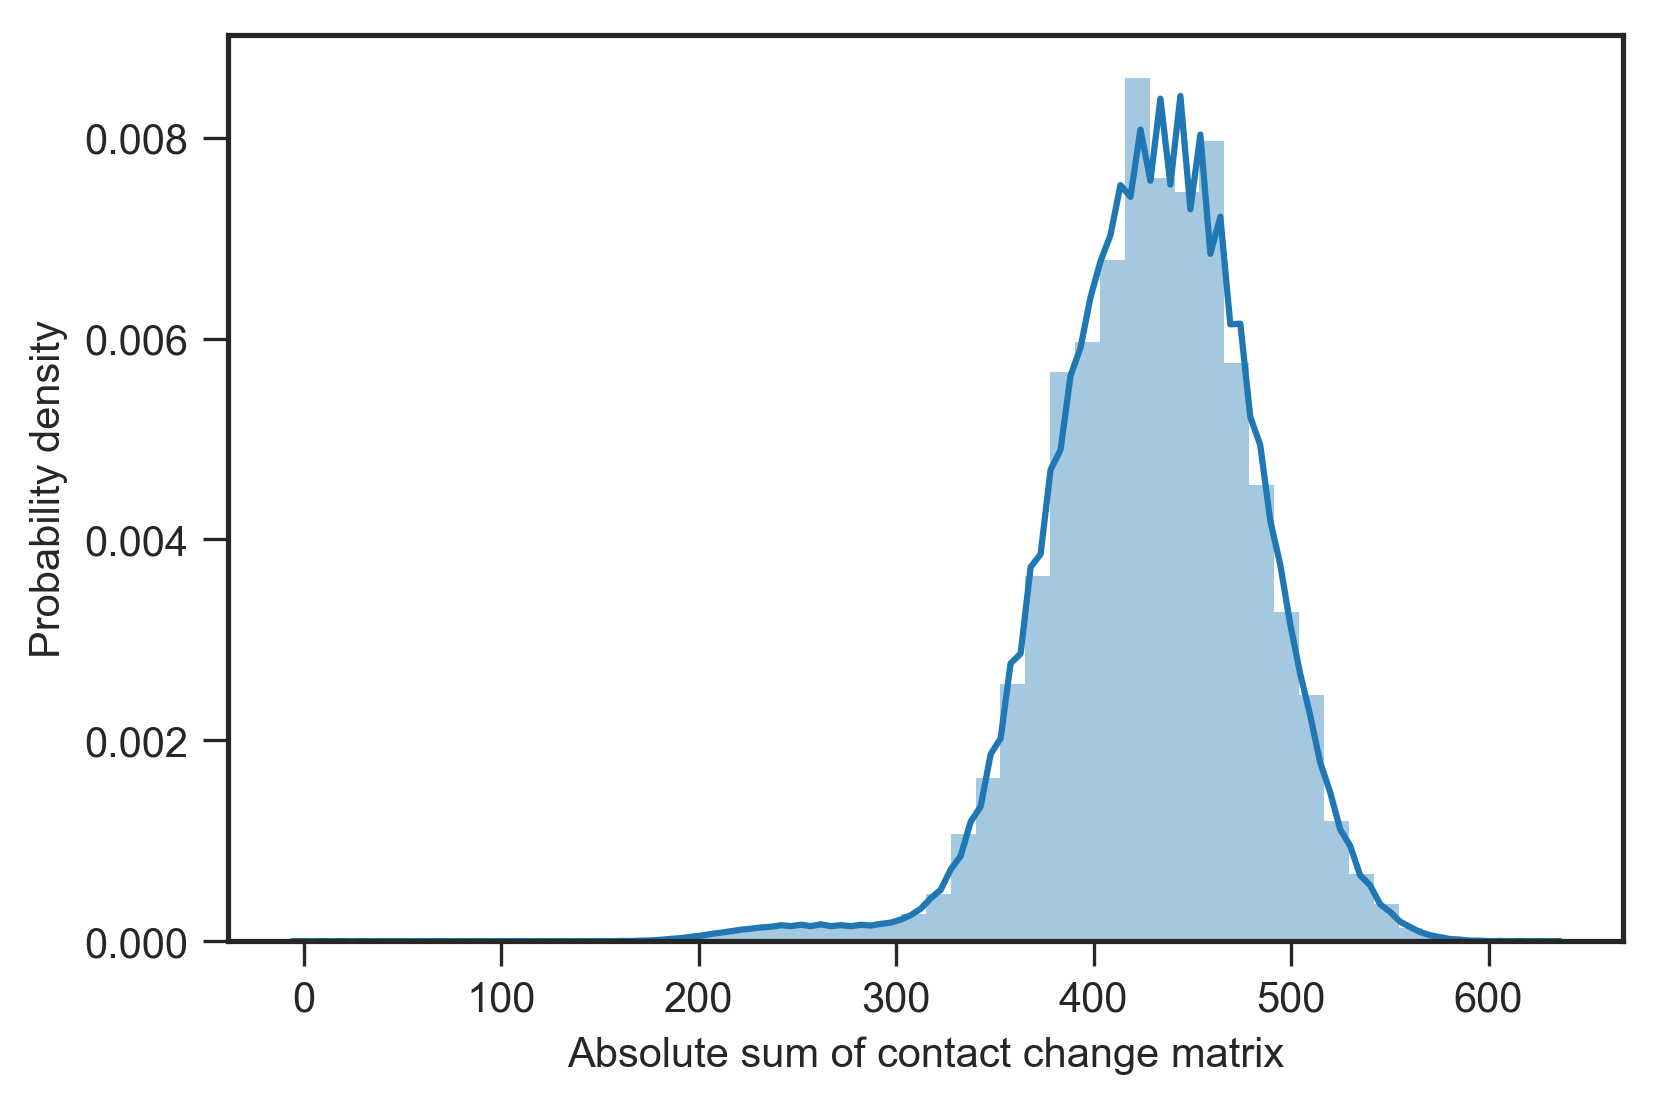

In [34]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(wt_all_contact_diffs))
ax.set_xlabel('Absolute sum of contact change matrix')
ax.set_ylabel('Probability density')
plt.show()

In [35]:
# ok great now calculate the differences of the 'new conformations' to wt

In [43]:
run9_newconf_trajs

[<mdtraj.Trajectory with 2 frames, 2580 atoms, 162 residues, and unitcells at 0x127245da0>,
 <mdtraj.Trajectory with 12 frames, 2580 atoms, 162 residues, and unitcells at 0x1280b2e48>,
 <mdtraj.Trajectory with 44 frames, 2580 atoms, 162 residues, and unitcells at 0x127974be0>,
 <mdtraj.Trajectory with 23 frames, 2580 atoms, 162 residues, and unitcells at 0x1271e7c88>]

In [44]:
run9_newconf_contact_maps = []

for traj in run9_newconf_trajs:
    distances, residue_pairs = md.compute_contacts(traj)
    contact_map = md.geometry.squareform(distances, residue_pairs)
    contact_map_bool = contact_map < 0.4
    contact_map_bool_float = contact_map_bool.astype('float')
    run9_newconf_contact_maps.append(contact_map_bool_float)

In [53]:
run9_newconf_contact_maps[0].shape

(2, 162, 162)

In [54]:
run9_newconf_contact_map_diffs = []

for traj in run9_newconf_contact_maps:
    run9_newconf_contact_map_diffs.append([])
    for frame in traj:
        diff = np.sum(np.absolute(wt_contact_maps[::10] - frame), axis=(1,2)) 
        run9_newconf_contact_map_diffs[-1].append(diff)

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


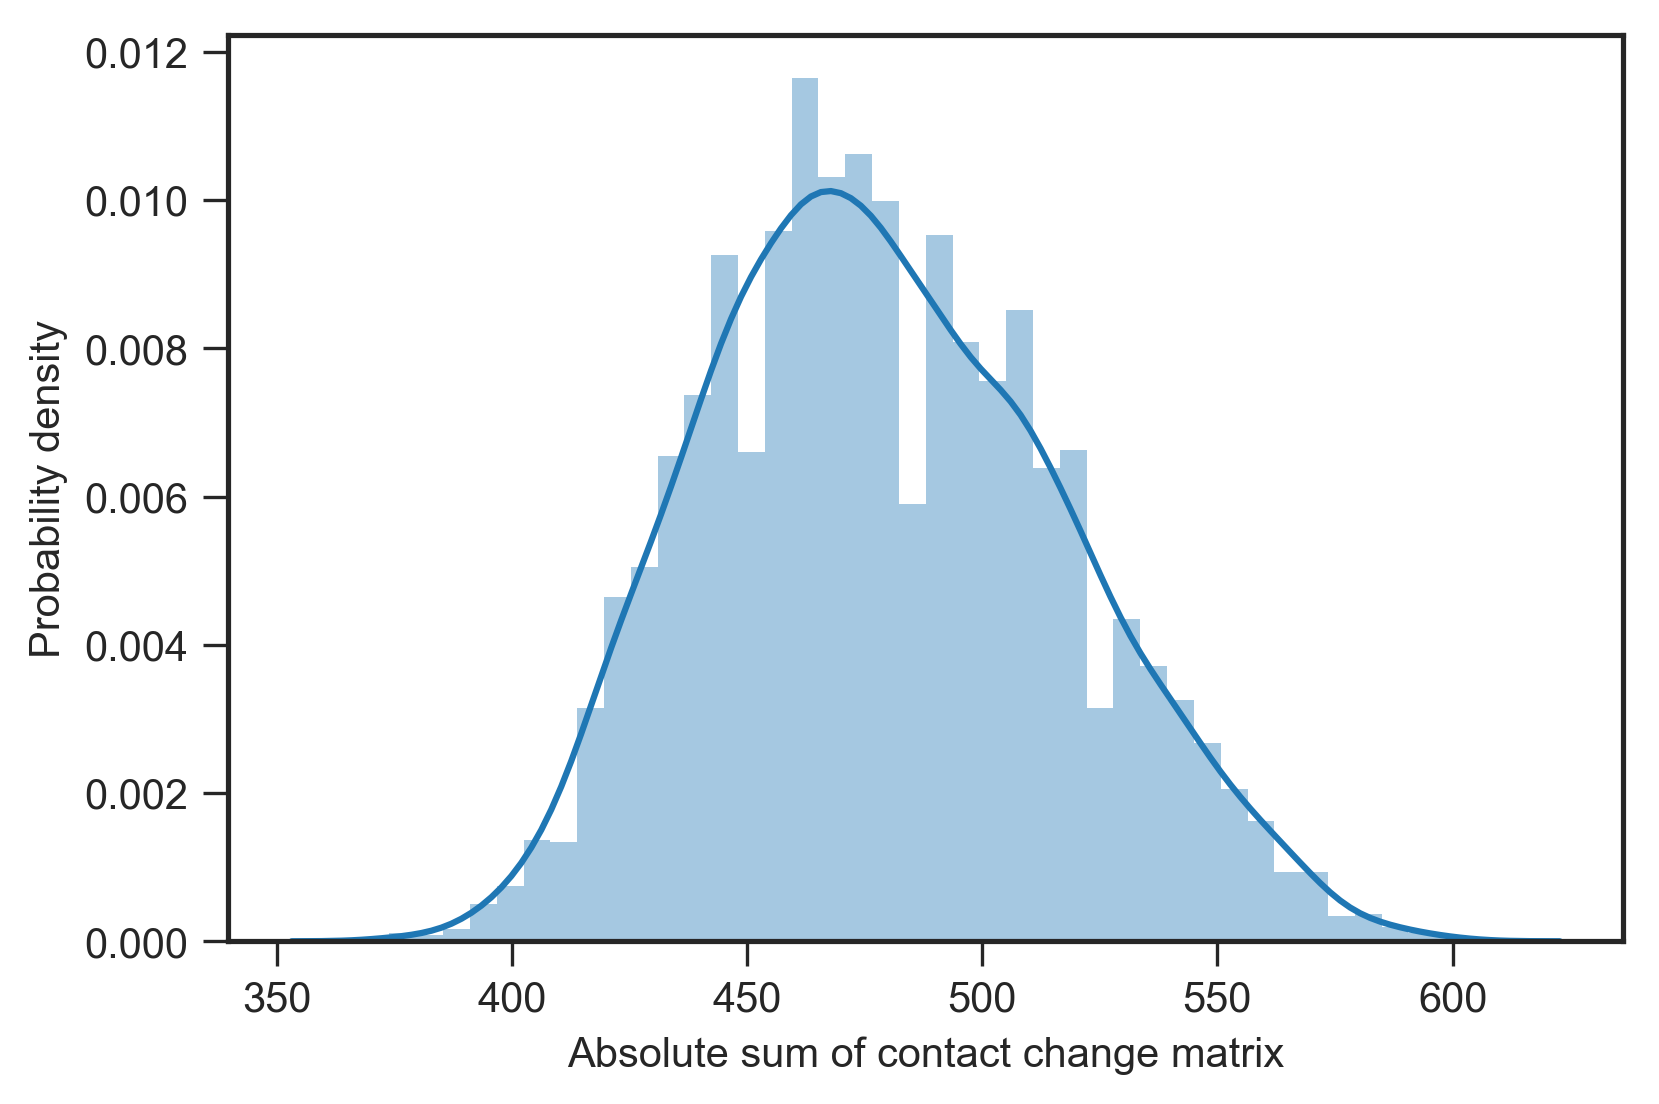

In [56]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(run9_newconf_contact_map_diffs[0]))
ax.set_xlabel('Absolute sum of contact change matrix')
ax.set_ylabel('Probability density')
plt.show()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


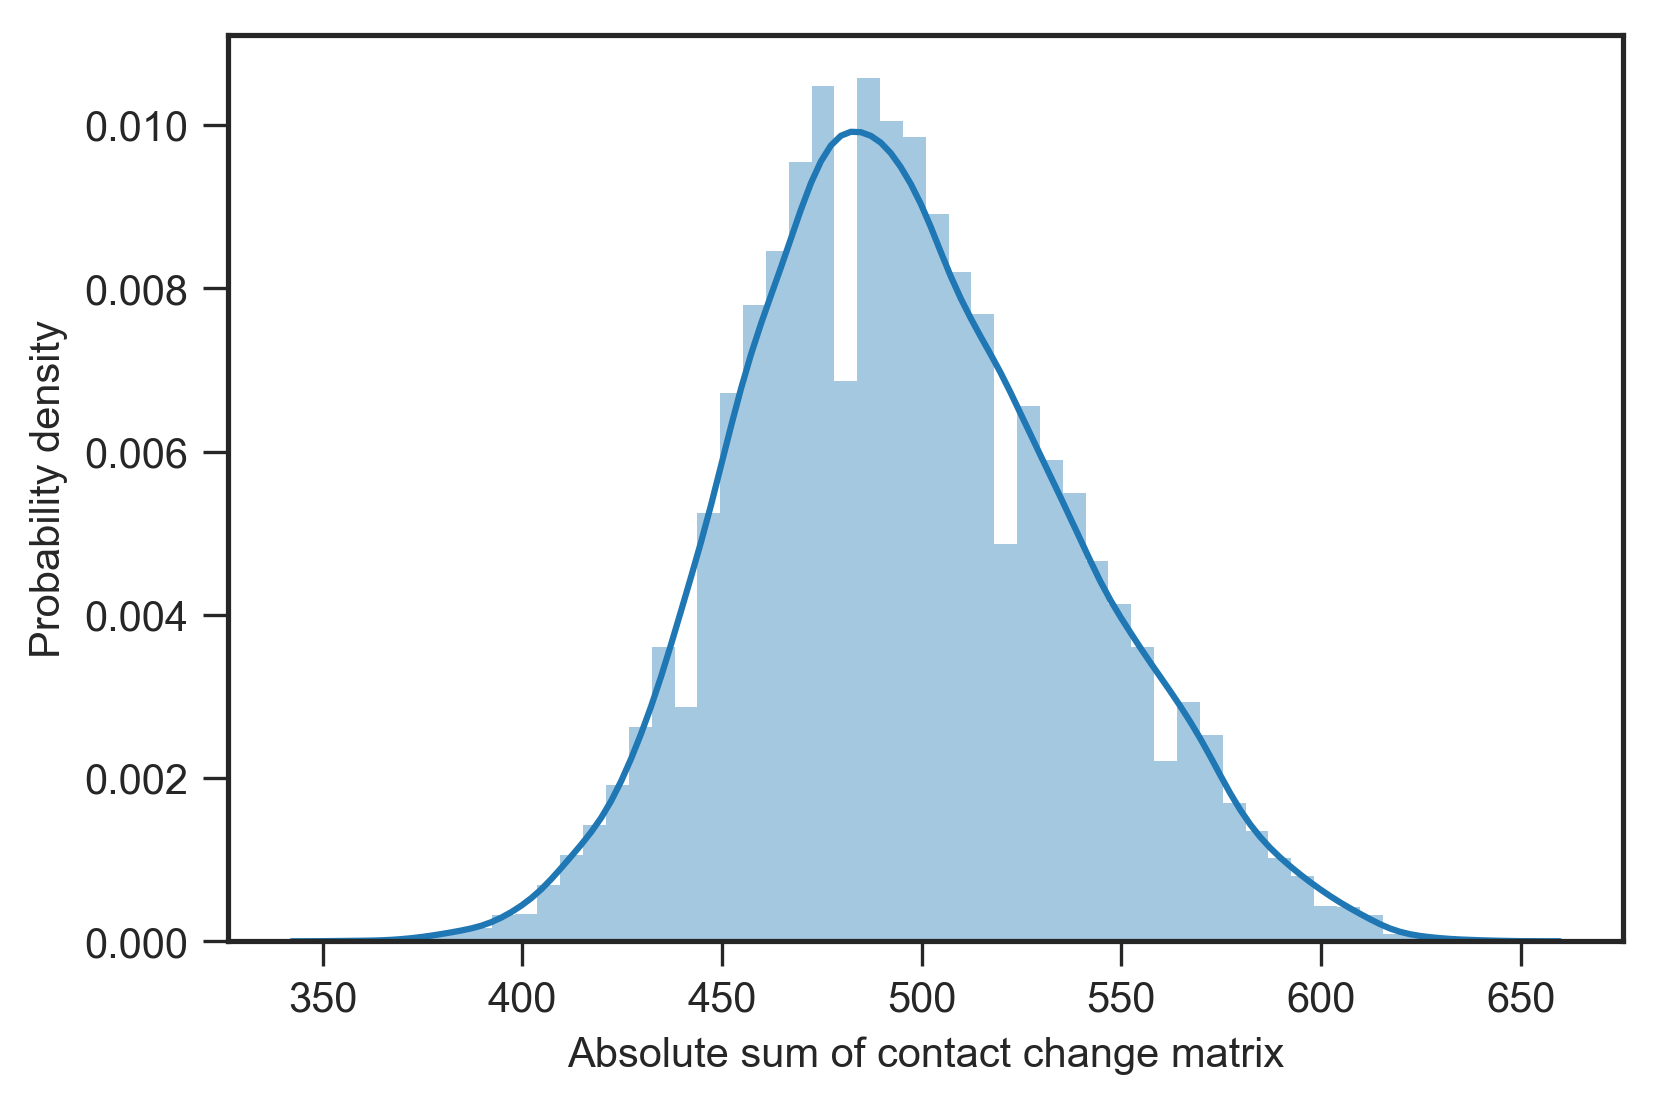

In [57]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(run9_newconf_contact_map_diffs[1]))
ax.set_xlabel('Absolute sum of contact change matrix')
ax.set_ylabel('Probability density')
plt.show()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


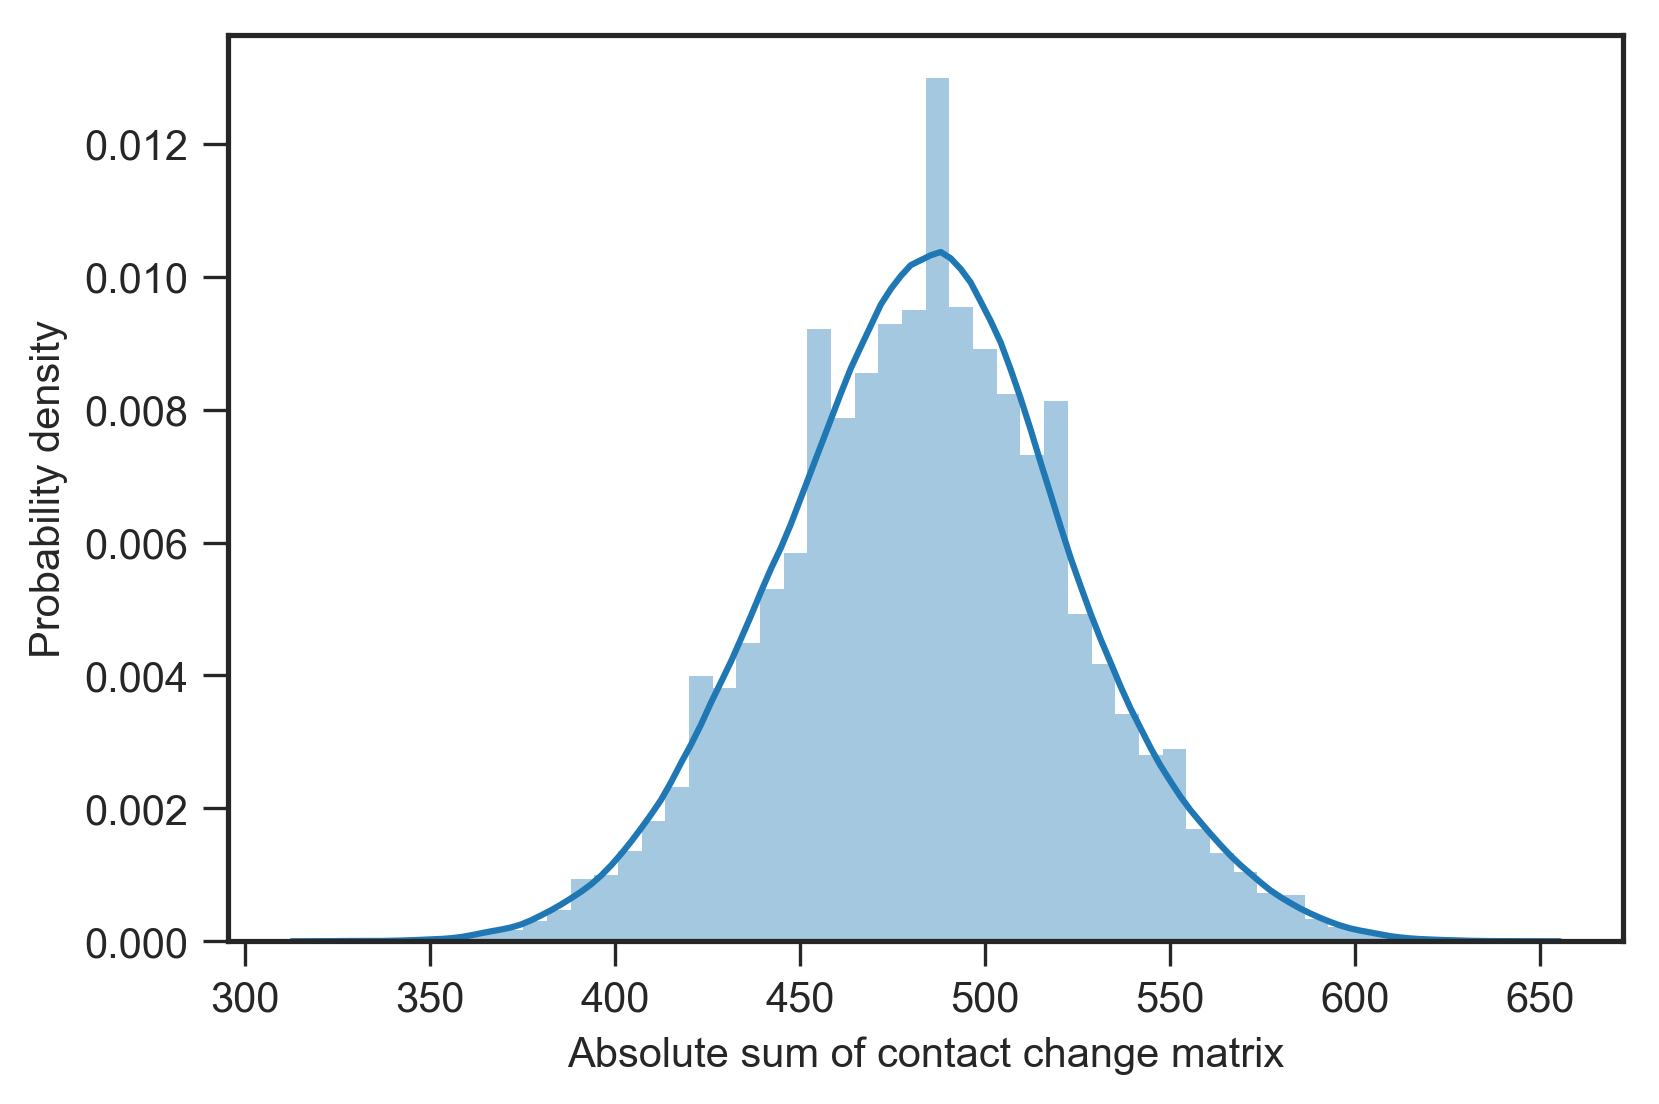

In [58]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(run9_newconf_contact_map_diffs[2]))
ax.set_xlabel('Absolute sum of contact change matrix')
ax.set_ylabel('Probability density')
plt.show()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


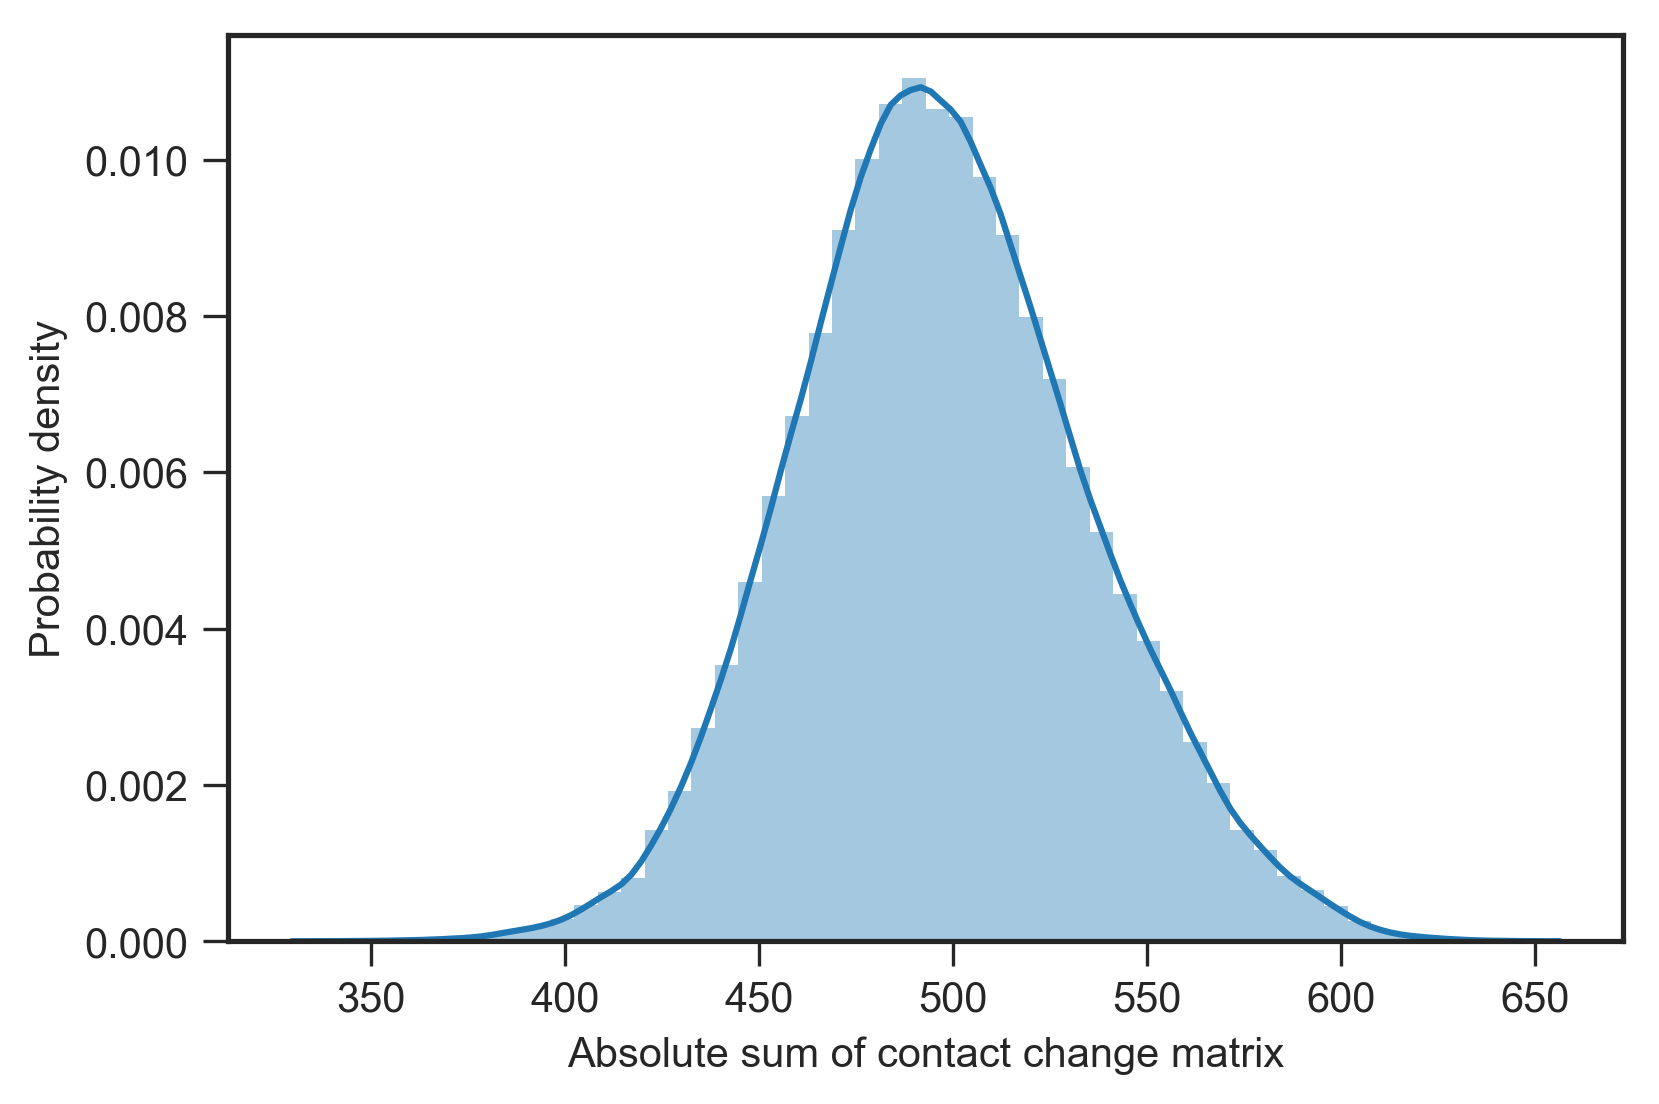

In [59]:
plt.figure(dpi=300)
ax = sns.distplot(np.concatenate(run9_newconf_contact_map_diffs[3]))
ax.set_xlabel('Absolute sum of contact change matrix')
ax.set_ylabel('Probability density')
plt.show()

In [60]:
# now get the closest wt frames to these new conformations

In [74]:
run9_newconf_mindiff_frames = []

for i in range(4):
    run9_newconf_mindiff_frames.append([])
    for frame in run9_newconf_contact_map_diffs[i]:
        run9_newconf_mindiff_frames[-1].append(np.argmin(frame))

In [75]:
run9_newconf_mindiff_frames

[[2065, 1717],
 [2350, 2326, 725, 740, 689, 725, 824, 740, 740, 836, 824, 824],
 [1684,
  1683,
  1684,
  1684,
  679,
  1684,
  1673,
  679,
  1683,
  1676,
  1683,
  1676,
  1676,
  1690,
  1684,
  1676,
  1683,
  1676,
  139,
  1683,
  1676,
  1684,
  1683,
  1676,
  1665,
  1687,
  1665,
  2154,
  2762,
  1676,
  1676,
  1690,
  1647,
  1676,
  1676,
  1679,
  1673,
  1683,
  1683,
  1690,
  1683,
  2316,
  1676,
  1690],
 [673,
  673,
  671,
  673,
  671,
  679,
  684,
  679,
  679,
  679,
  677,
  679,
  679,
  666,
  680,
  673,
  679,
  1694,
  673,
  679,
  679,
  679,
  677]]

In [76]:
run9_newconf_mindiff_diffs = []

for i in range(4):
    run9_newconf_mindiff_diffs.append([])
    for frame in run9_newconf_contact_map_diffs[i]:
        run9_newconf_mindiff_diffs[-1].append(np.min(frame))

In [77]:
run9_newconf_mindiff_diffs

[[378.0, 374.0],
 [384.0,
  386.0,
  372.0,
  396.0,
  428.0,
  358.0,
  358.0,
  368.0,
  368.0,
  388.0,
  372.0,
  390.0],
 [342.0,
  324.0,
  366.0,
  368.0,
  360.0,
  330.0,
  376.0,
  352.0,
  344.0,
  334.0,
  346.0,
  362.0,
  356.0,
  340.0,
  346.0,
  374.0,
  358.0,
  366.0,
  370.0,
  380.0,
  374.0,
  352.0,
  376.0,
  384.0,
  370.0,
  382.0,
  362.0,
  382.0,
  386.0,
  370.0,
  378.0,
  366.0,
  362.0,
  370.0,
  362.0,
  386.0,
  360.0,
  376.0,
  388.0,
  378.0,
  366.0,
  392.0,
  378.0,
  382.0],
 [342.0,
  366.0,
  366.0,
  362.0,
  378.0,
  394.0,
  394.0,
  360.0,
  370.0,
  384.0,
  384.0,
  378.0,
  350.0,
  380.0,
  390.0,
  404.0,
  362.0,
  414.0,
  394.0,
  386.0,
  386.0,
  382.0,
  402.0]]

In [80]:
run9_newconf_mindiff_frames_sets = []

for x in run9_newconf_mindiff_frames:
    run9_newconf_mindiff_frames_sets.append(set(x))

In [82]:
run9_newconf_mindiff_frames_sets

[{1717, 2065},
 {689, 725, 740, 824, 836, 2326, 2350},
 {139,
  679,
  1647,
  1665,
  1673,
  1676,
  1679,
  1683,
  1684,
  1687,
  1690,
  2154,
  2316,
  2762},
 {666, 671, 673, 677, 679, 680, 684, 1694}]

In [86]:
wt_trajs_contact_map_order = [('/Volumes/DATA/11713_wt/' + x.split('/')[-1][:-4] + '.h5') for x in glob.glob('/Volumes/DATA/11713_wt_contact_maps/*.npy')]

In [88]:
wt_traj = md.load(wt_trajs_contact_map_order[0])

for traj in wt_trajs_contact_map_order[1:]:
    traj_ = md.load(traj)[1500:][::10]
    wt_traj = md.join([wt_traj, traj_])

In [89]:
for run in range(4):
    for frame in run9_newconf_mindiff_frames_sets[run]:
        wt_traj[frame].save('new_conf_closest_wt_frames_contacts/%d_%d.h5' % (run,frame))
        wt_traj[frame].save('new_conf_closest_wt_frames_contacts/%d_%d.pdb' % (run,frame))

In [1]:
########
# now extract frames closest in RMSD to the RUN9 new conformations from all-WT dataset (5 ms)
# rmsd to 10-strided dataset was calculated on HAL